# 构造三阶B样条节点向量，写出各阶上的基函数

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.interpolate import BSpline

In [3]:
t = np.arange(11)
#print(t)
curve_list = []

for k in [0,1,2,3]:
    i = 3
    while i < t[-1]-k-3:
        #print(i)
        coeff = np.zeros_like(t)
        coeff[i] = 1
        spl = BSpline(t, coeff, k)
        x_new = np.linspace(t[0], t[-1], 500)
        y_new = spl(x_new)
        curve_list.append((x_new, y_new))
        i += 1

/var/folders/nv/dz6531zs5j55fkgkqvfp8vp80000gn/T/ipykernel_6082/2923369291.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs1.set_xticklabels(labels_list)
/var/folders/nv/dz6531zs5j55fkgkqvfp8vp80000gn/T/ipykernel_6082/2923369291.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs2.set_xticklabels(labels_list)
/var/folders/nv/dz6531zs5j55fkgkqvfp8vp80000gn/T/ipykernel_6082/2923369291.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs3.set_xticklabels(labels_list)
/var/folders/nv/dz6531zs5j55fkgkqvfp8vp80000gn/T/ipykernel_6082/2923369291.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs4.set_xticklabels(labels_list)
/var/folders/nv/

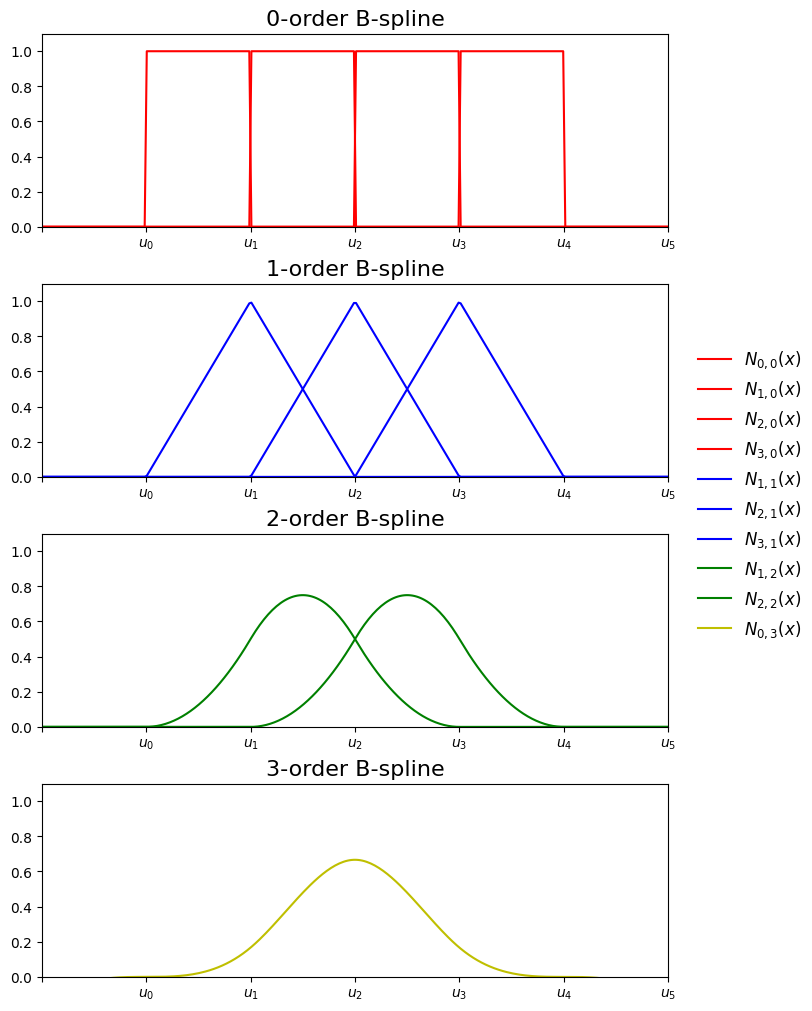

In [7]:
fig = plt.figure(figsize=(8, 10),constrained_layout=True)
gs = gridspec.GridSpec(16, 6, figure=fig)
axs1 = fig.add_subplot(gs[:4, :5])
axs2 = fig.add_subplot(gs[4:8, :5])
axs3 = fig.add_subplot(gs[8:12, :5])
axs4 = fig.add_subplot(gs[12:, :5])
fig_dict = {'1':axs1, '2':axs2, '3':axs3, '4':axs4}

for i, value in enumerate(curve_list):
    if i<=3:
        axs1.plot(value[0], value[1], label='$N_{'+str(i)+',0}(x)$', color='r')
    elif i<=6:
        axs2.plot(value[0], value[1], label='$N_{'+str(i-3)+',1}(x)$', color='b')
    elif i<=8:
        axs3.plot(value[0], value[1], label='$N_{'+str(i-6)+',2}(x)$', color='g')
    else:
        axs4.plot(value[0], value[1], label='$N_{0,3}(x)$', color='y')

#axs.yaxis.set_visible(False)
axs1.set_ylim(0, 1.1)
axs2.set_ylim(0, 1.1)
axs3.set_ylim(0, 1.1)
axs4.set_ylim(0, 1.1)
axs1.set_xlim(2, 8)
axs2.set_xlim(2, 8)
axs3.set_xlim(2, 8)
axs4.set_xlim(2, 8)
axs1.set_title('0-order B-spline', fontsize=16)
axs2.set_title('1-order B-spline', fontsize=16)
axs3.set_title('2-order B-spline', fontsize=16)
axs4.set_title('3-order B-spline', fontsize=16)
#ticks_list = [-3,-2,-1,0,1,2,3,4,5,6,7,8]
labels_list = ['$u_{'+str(i)+'}$' for i in range(6)]
labels_list.insert(0,'')
#axs.set_xticks(ticks_list)
axs1.set_xticklabels(labels_list)
axs2.set_xticklabels(labels_list)
axs3.set_xticklabels(labels_list)
axs4.set_xticklabels(labels_list)
#axs.plot([0,x_new[0]],[0,y_new[0]],'k--',linewidth=1)
#axs.plot([5,x_new[-1]],[0,y_new[-1]],'k--',linewidth=1)

fig.legend(loc=(0.85,0.36),ncol=1, frameon=False, fontsize=12)
fig.show()
fig.savefig('HW3.pdf', dpi=300, bbox_inches='tight')